In [1]:
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns

<center><font size=72pt>Анонс следующей лекции</font></center>

Уже __10 февраля__, в день, когда проводится олимпиада Физтех и сам МФТИ из-за неё будет закрыт, мы поговорим про то, что можно делать в __Python__ в контексте анализа данных. Почему нужен именно __Python__? Всё просто: 

- В анализе данных приоритет отдаётся не _быстродействию_, а _результатам_ и _их интерпретации_.
- Кроме того, для Python существует довольно много _готовых и удобных инструментов_ для анализа данных.
- Как следствие, знание Python относится к одним из __жизненно важных навыков__ для работы в сфере анализа данных.

Анонс будет довольно коротким, здесь будет затронута лишь _малая часть_ того, что будет на лекции. Хотите больше? Подключайтесь!

# NumPy

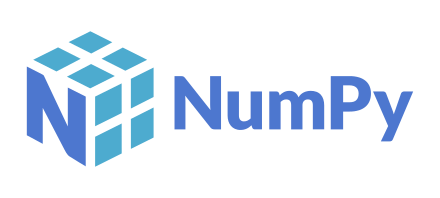

Пакет `numpy` предоставляет $n$-мерные однородные массивы (все элементы одного типа); в них нельзя вставить или удалить элемент в произвольном месте. В `numpy` реализовано много операций над массивами в целом. Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в `C` или `matlab` — львиная доля времени тратится в библиотечных функциях, написанных на `C`. _Например, задачи, связанные с **циклами**, могут хорошо свестись к задачам, связанные с операциями над массивами._

Почему задачи, которые могут решаться с помощью циклов, которые могут быть вложенными, возможно решать гораздо быстрее с помощью пакета `numpy`? Большой вклад обеспечивает механизм, получивший название **broadcasting**. Простыми словами, один из массивов _«растягивается»_ под размеры другого массива.

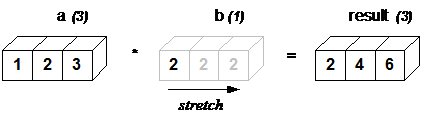

In [2]:
a = np.array([1, 2, 3])
b = np.array([2])

# Оператор * отвечает за поэлементное умножение матриц.
# Для умножения матриц между собой предназначен оператор @.
print(a * b)

[2 4 6]


Представьте себе, что этого механизма не существовало бы. Конечно, можно было бы обойтись поэлементным умножением.

In [3]:
print(a * np.array([2, 2, 2]))

[2 4 6]


Но что делать с большими размерностями, многомерными массивами? Конечно, удобств было бы куда меньше.

Как же _broadcasting_ работает с многомерными массивами? Если по какому-то измерению размер у одного массива равен $1$, а у другого — произвольный, то по этому измерению может произойти "рястяжение". Таким образом, массивы можно умножать друг на друга, если в измерениях, где они по размеру не совпадают, хотя бы у одного размер $1$. Для других поэлементных операций правило аналогично.

Важно отметить, что размерности сопоставляются справа налево. Если их количество не совпадает, что массивы меньшей размерности сначала дополняются слева размерностями 1. Например, при сложении массива размера $4 \times 3$ с массивом размера $3$ последний сначала преобразуется в массив размера $1 \times 3$.

In [4]:
a = np.array([[ 0,  0,  0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]])

b = np.array([0, 1, 2])

print(a + b)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Схематично проведенную операцию можно визуализировать следующим образом.

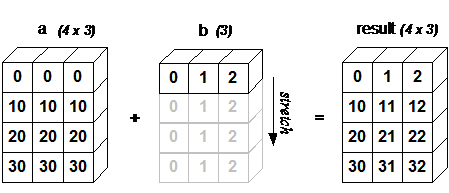


Если неединичные размерности справа не будут совпадать, то выполнить операцию уже не получится. Например, как приведено на схеме ниже. 

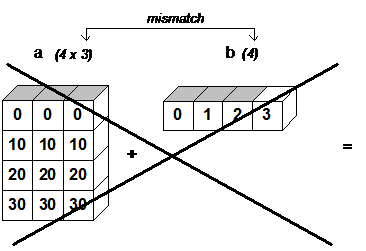


А если размеры будут не совместимы, то произойдет ошибка.

In [5]:
b = np.array([1.0, 2.0, 3.0, 4.0])
a + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

Если массивы имеют несовместимый размер, то их можно сначала привести к одной форме.

In [6]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a.reshape((-1, 1)) + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

*Замечание*

Знать про broadcasting нужно, но пользоваться им надо с осторожностью. Многократное копирование массива при растяжении может привести к неэффективной работе программы по памяти. Особенно за этим приходится следить при работе с GPU.

Не менее **важный** вопрос: действительно ли `numpy` так эффективен по времени? Попробуем найти сумму первых $10^8$ чисел. Магическая команда для Jupyter Notebook `%%time` поможет нам измерить время.

In [7]:
%%time

sum_value = 0
for i in range(10 ** 8):
    sum_value += i
print(sum_value)

4999999950000000
CPU times: user 11.7 s, sys: 16.9 ms, total: 11.7 s
Wall time: 11.8 s


Попробуем улучшить код.

In [8]:
%%time

sum_value = sum(range(10 ** 8))
print(sum_value)

4999999950000000
CPU times: user 1.76 s, sys: 964 µs, total: 1.76 s
Wall time: 1.74 s


Попробуем переписать на `numpy`.

In [9]:
%%time

sum_value = np.arange(10 ** 8).sum()
print(sum_value)

4999999950000000
CPU times: user 101 ms, sys: 441 ms, total: 543 ms
Wall time: 563 ms


Ну что же, выигрыш по времени действительно впечатляет!

# Про линтеры

Стиль кода является довольно важной вещью для соблюдения. Например, именно стиль кода помогает в __командной работе__, способствует _более лёгкому чтению кода_, важность чего возрастает по мере присоединения новых участников к команде. Для Python стандартом является PEP 8, более полную и официальную информацию можно прочитать здесь: [https://peps.python.org/pep-0008/](https://peps.python.org/pep-0008/).

Перечислим кратко основные правила, которые касаются оформления кода на нашем курсе:

* Отступы составляют ровно 4 пробела, табуляции не используются. К слову, в Питоне нет ключевых слов по типу `{` и `}` в C и `begin` и `end` в Паскале. Блоки кода разделяются пробелами.
* Все переменные должны иметь понятные названия и состоять только из строчных букв. Например, вместо того, чтобы назвать выборку как `X`, лучше назвать ее `sample`. В качестве разделителей используйте подчеркивания. В редких случаях можно и отступать от этого правила, если обозначения понятны из решаемой задачи.
* Вокруг всех знаков арифметических операций, присваивания и пр. обязательны пробелы с двух сторон. Исключение — запись вида `a=b` в аргументах функции. Примеры будут далее.
* Разделяйте логические куски программы пустыми строками. Вряд ли вы сможете написать код строк на 10-15, в который нельзя вставить ни одну пустую строку, разделяющую код на логические части. __Перед__ всеми логическими кусками кода должен быть комментарий к этому куску кода.
* Все функции (кроме самых маленьких) должны содержать подробную документацию, написанную по правилам оформления документаций.
* Если комментарий дается на строке с кодом, то оформить его стоит так:

`код [ровно 2 пробела] # [ровно 1 пробел] комментарий`

* Если комментарий дается на отдельной строке, то он должен иметь тот же отступ, что и строка кода под ним. Скорее всего перед таким комментарием можно вставить пустую строку.
* Не нужно комментировать очевидное.
* __Крайне важно:__ не нужно писать весь код в одной ячейке ноутбука!
* Не стоит создавать вермишель ячеек &mdash; несколько подряд идущих ячеек с 1-3 строками кода, если в этом нет необходимости.
* Если есть возможность, при выводе десятичных чисел следует оставлять разумное число знаков после запятой.

Отдельно стоит отметить, что код должен быть понятен проверяющему.
В частности, должны использоваться понятные названия переменных и присутствовать подробные комментарии.
**Если проверяющий не поймет код, оценка за задание может быть снижена.**

Кроме того, _все ноутбуки, которые присылаются в бот, проходят проверку **линтером**._ С помощью линтера происходит _статический анализ_ кода на предмет соответствия стилю кода. Линтеры **крайне полезны** в командной работе, особенно в больших компаниях. В части компаний код _не сможет пойти в «прод»_, если он _не пройдёт проверку линтером_.

Одним из популярных средств для этого является [Black](https://pypi.org/project/black/). Чтобы с помощью него можно было проверять ноутбуки, его нужно устанавливать следующим образом: `pip install "black[jupyter]"`.

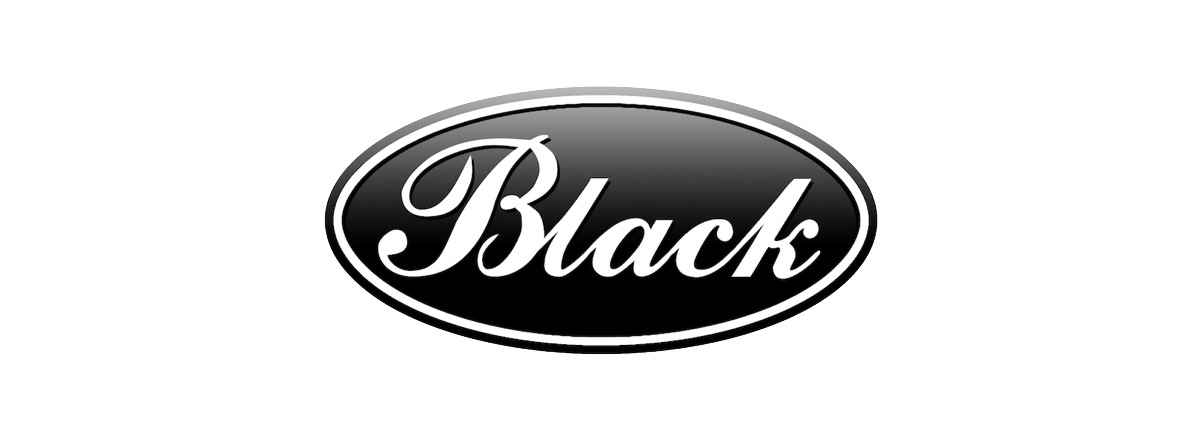

Небольшие примеры, как работает Black:

Больше примеров с описанием можно найти здесь: [https://black.readthedocs.io/en/stable/the_black_code_style/current_style.html](https://black.readthedocs.io/en/stable/the_black_code_style/current_style.html).

# Про анимацию

Пакет `matplotlib` славен не только `pyplot`. Например, с помощью `matplotlib.animation` можно делать анимированные графики... Впрочем, не только графики: интерактивную анимацию в целом!

Казалось бы, вот пустой серый фон... Но что будет дальше?

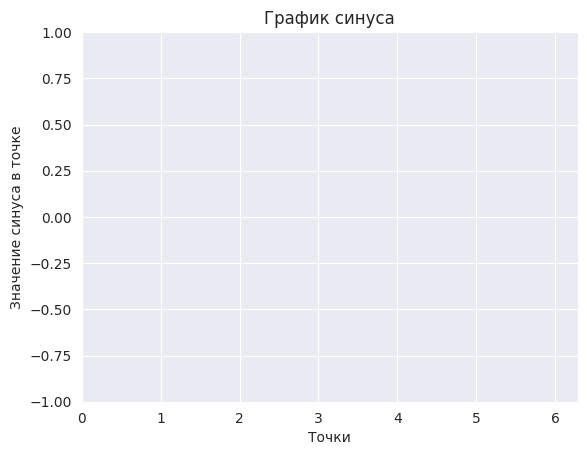

In [10]:
points = np.linspace(0, 2 * np.pi)
values = np.sin(points)

# настраиваем серый фон, для белого фона нужен whitegrid
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots()
    ax.axis([0, 2 * np.pi, -1, 1])
    cur_plot, = ax.plot([],[])
    ax.set_xlabel('Точки')
    ax.set_ylabel('Значение синуса в точке')
    ax.set_title('График синуса')

Далее анимируем, сохраняем в файл.

In [11]:
def animate(iter):
    ''' Отвечает за анимацию. '''
    cur_plot.set_data(points[:iter], values[:iter])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(points))
with open("animation.html", "w") as f:
    f.write(ani.to_jshtml())

Смотрим, что получилось.

In [12]:
HTML('animation.html')

# О цвете фона графиков

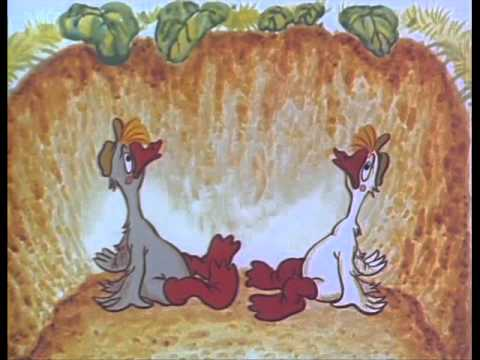

Графики разделяются на два вида: «лёгкие» и «тяжёлые». Как правило, для первых подходит серый фон, а для другого подходит белый фон (см. [рекомендации от разработчиков seaborn](https://seaborn.pydata.org/tutorial/aesthetics.html)). То же правило соблюдается и на курсах Физтех.Статистики: например, «Введение в анализ данных». **За выбор неподходящего цвета фона графика могут быть сняты баллы!**

Почему лёгкие графики нужно рисовать на сером фоне, а другие графики нужно рисовать на белом фоне? Давайте посмотрим своими глазами и сами убедимся, что рекомендации написаны не просто так! 

Начнём с тяжёлого примера:

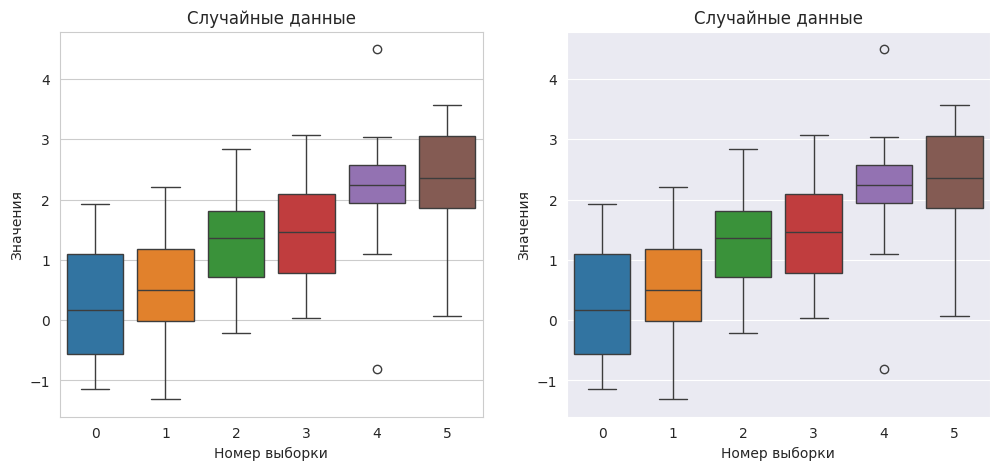

In [13]:
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(12, 5))

with sns.axes_style('whitegrid'):
    plt.subplot(121)
    sns.boxplot(data=data)
    plt.title('Случайные данные')
    plt.xlabel('Номер выборки')
    plt.ylabel('Значения')

with sns.axes_style('darkgrid'):
    plt.subplot(122)
    sns.boxplot(data=data)
    plt.title('Случайные данные')
    plt.xlabel('Номер выборки')
    plt.ylabel('Значения')

Теперь пробуем более лёгкий пример:

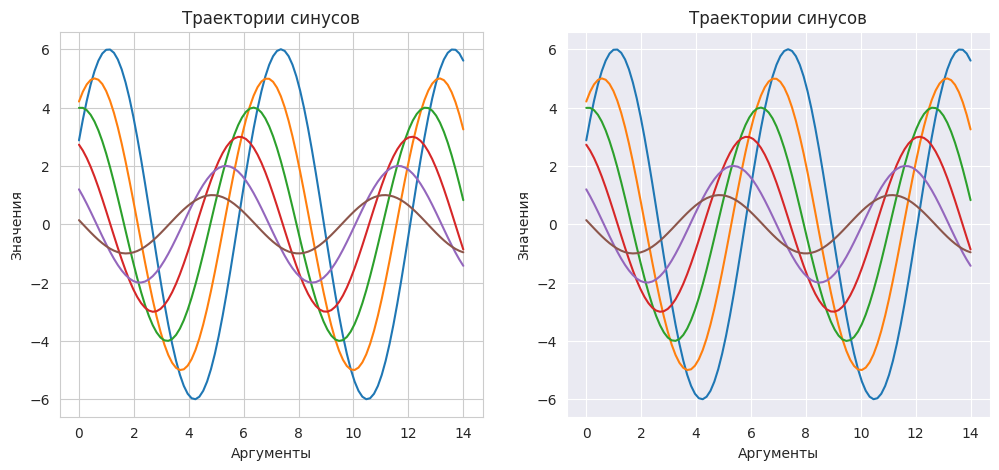

In [14]:
x = np.linspace(0, 14, 100)
plt.figure(figsize=(12, 5))


with sns.axes_style('whitegrid'):
    plt.subplot(121)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
    plt.title('Траектории синусов')
    plt.xlabel('Аргументы')
    plt.ylabel('Значения')

with sns.axes_style('darkgrid'):
    plt.subplot(122)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))
    plt.title('Траектории синусов')
    plt.xlabel('Аргументы')
    plt.ylabel('Значения')